What this notebook does:

Scraped tables of Yelp reviews are merged, duplicate reviews are removed.

Text of the review is processed to a form easier for LDA analysis (lower-cased, abbreviations removed, etc). New column is called 'mreviewtxt'.

Resulting data frame is saved to './ProcessedData/allreviews_txtprocessed.csv'

Mentions of coffee related terms are counted for each shop and saved to './ProcessedData/freqcoffeeterms_reviews.csv'. These counts will be used to filter out coffee shops where coffee is not a focus.

In [ ]:
#Step one directory up to access the yelp scraping function in the helper_functions module
import os
print(os.getcwd())
os.chdir('../')
os.getcwd()

In [5]:
import numpy as np
import pandas as pd

### Combining tables of scraped Yelp reviews

In [6]:
reviews1 = pd.read_csv('./Data/reviews_0to250_orderedbydate.csv')
reviews2 = pd.read_csv('./Data/reviews_250to579_orderedbydate.csv')
reviews3 = pd.read_csv('./Data/reviews_norevshops_0to250_orderedbydate.csv')
reviews4 = pd.read_csv('./Data/reviews_norevshops_250to483_orderedbydate.csv')
reviews5 = pd.read_csv('./Data/reviews_first70cs.csv')
reviews6 = pd.read_csv('./Data/reviews_70to225cs.csv')
reviews7 = pd.read_csv('./Data/reviews_225to600cs.csv')
reviews8 = pd.read_csv('./Data/reviews_601to1000cs.csv')
reviews9 = pd.read_csv('./Data/reviews_897to1200cs.csv')


reviews = pd.concat([reviews1,reviews2,reviews3,reviews4,reviews5,reviews6,reviews7,reviews8,reviews9],ignore_index=True)
reviews.rename(columns={'idx':'shopidx'},inplace=True)
reviews.tail(4)

,shopidx,alias,date,rating,reviewtxt
84179,1196,dunkin-new-york-163,2017-06-30,1.0,You'd think that a midtown west location would...
84180,1196,dunkin-new-york-163,2017-01-06,1.0,"Just ordered a bacon, egg and cheese on bagel ..."
84181,1196,dunkin-new-york-163,2016-08-16,1.0,Same people working from the old location arou...
84182,1196,dunkin-new-york-163,2016-08-12,3.0,Just OK. People working the registers don't re...


In [7]:
#Making the txt of the review more friendly to nlp. These substitutions come courtesy of TK Daisy Leung
text_field = 'reviewtxt'
mtext_field = 'mreviewtxt'
df = reviews
print(df.shape)
print(df.reviewtxt.value_counts().head(3))
df.drop_duplicates(inplace=True,subset = ['reviewtxt'])
print(df.shape)
print(df.reviewtxt.value_counts().head(3))
reviews = df.reset_index()

(84183, 5)
Overpriced acidic bitter coffee. Staff can't make a decent espresso even with those expensive machines from Italy .                                                                                                                                                                                                                                                                                                                                            6
This starbucks is the WORST.  They consistently cannot keep up with their orders.  I order an ice coffee daily with LIGHT cream ( meaning - a splash) -its always way too much cream. I asked them to correct it today & they dumped out half of it and added more coffee vs. fixing it. The hot food always takes too long. So you end up with a watery drink and a steamy sandwich. The staff is always busy on their phones or gossiping w/ one another.    4
Matto is essentially a discounted coffee shop where everything is $2. I like the cheesecake

In [8]:
reviews[reviews.alias=='kodawari-coffee-new-york']

,index,shopidx,alias,date,rating,reviewtxt
57733,60808,193,kodawari-coffee-new-york,2018-11-19,5.0,"Kodawari is a trendy, aesthetically-pleasing c..."
57734,60809,193,kodawari-coffee-new-york,2020-03-09,4.0,I was lucky to get a spot here as there's only...
57735,60810,193,kodawari-coffee-new-york,2019-06-01,4.0,A bunch of new/hipster coffee shops opening ar...
57736,60811,193,kodawari-coffee-new-york,2019-07-19,3.0,It really depends on which person is making yo...
57737,60812,193,kodawari-coffee-new-york,2019-07-28,5.0,"This is a very small, cute place by the Grand ..."
57738,60813,193,kodawari-coffee-new-york,2019-07-28,3.0,Just stopped by here on Sunday to grab a super...
57739,60814,193,kodawari-coffee-new-york,2019-11-07,5.0,The coffee here is phenomenal! If you get iced...
57740,60815,193,kodawari-coffee-new-york,2018-07-02,5.0,Very cute little cafe with exactly three two s...
57741,60816,193,kodawari-coffee-new-york,2018-05-21,4.0,I forgot to buy my wife coffee. \n\nCaffeine d...
57742,60817,193,kodawari-coffee-new-york,2018-10-15,5.0,I really enjoyed this place! I caught up on li...


In [9]:
#Removing accented characters from reviews

import unicodedata
# function to remove accented characters
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

df[mtext_field] = df[text_field].apply(remove_accented_chars)

for text in df[mtext_field][0:2]:
    print(text)



WOW WHAT HATE FROM THE LEFTIST OWNER - They want to silence thought that doesn't come from their radical views. #AllLivesMatter I really liked this place but there was a girl that works there who told me in America we have "Systemic Racism", No True. We have Racism but not systemic. https://www.google.com/amp/s/www.wsj.com/amp/articles/the-myth-of-systemic-police-racism-11591119883 
  keep the Hate Brewing
My favorite coffee shop! Staff are friendly and nice. I really like the coffee beans they use here, very fresh and nice. My favorite drinks are the latte and cortado. Brought my friend here last time and she absolutely loved it. They also have a wide selection of syrups and milk selections. They also have bakery items like croissants and also menu food items for a quick brunch. Although the line is sometimes long especially in the morning, it moves pretty fast and you get what you pay for. They also have a stamp card, so after around 10 drinks you can qualify for a free drink!


In [10]:
#Making the txt of the review more friendly to nlp. These substitutions come courtesy of TK Daisy Leung

df[mtext_field] = df[mtext_field].str.replace(r"http", "")
df[mtext_field] = df[mtext_field].str.replace(r"@\S+", "")
df[mtext_field] = df[mtext_field].str.replace(r"&", "and")
df[mtext_field] = df[mtext_field].str.replace(r"#", " ")
df[mtext_field] = df[mtext_field].str.replace(r"@", "at ")
#df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\"\_\n]", " ")
df[mtext_field] = df[mtext_field].str.replace(r"\d+", " ")
df[mtext_field] = df[mtext_field].str.replace(r"`", "'")
df[mtext_field] = df[mtext_field].str.replace(r",", " ")           
df[mtext_field] = df[mtext_field].str.replace(r"!", " ") 
df[mtext_field] = df[mtext_field].str.replace(r"(", " ") 
df[mtext_field] = df[mtext_field].str.replace(r")", " ") 
df[mtext_field] = df[mtext_field].str.replace(r"?", " ") 
df[mtext_field] = df[mtext_field].str.replace(r"@", " ") 
df[mtext_field] = df[mtext_field].str.replace(r"_", " ") 
df[mtext_field] = df[mtext_field].str.replace(r"%", " ") 
df[mtext_field] = df[mtext_field].str.replace(r"$", " ") 
#df[text_field] = df[text_field].str.replace(r"@", " ") 
# but want to keep e.g., 18 years old, how would this info be captured?

#Scapy already recognizes contractions
#df[text_field] = df[text_field].str.replace(r"\'", " ")
#df[text_field] = df[text_field].str.replace(r"\"", " ")
df[mtext_field] = df[mtext_field].str.replace(r"\n", " ")
df[mtext_field] = df[mtext_field].str.replace(r"\r", " ")
df[mtext_field] = df[mtext_field].str.lower()
df[mtext_field] = df[mtext_field].str.replace(r"bc", "because")
df[mtext_field] = df[mtext_field].str.replace(r"b c", "because")
df[mtext_field] = df[mtext_field].str.replace(r"b/c", "because")
df[mtext_field] = df[mtext_field].str.replace(r"dr\.", "dr")
df[mtext_field] = df[mtext_field].str.replace(r"d\.r\.", "dr")
df[mtext_field] = df[mtext_field].str.replace(r"nyc", "")
#df[mtext_field] = df[mtext_field].str.replace(r"ny", "")
df[mtext_field] = df[mtext_field].str.replace(r"tbh", "to be honest")
df[mtext_field] = df[mtext_field].str.replace(r"hr", "hour")
reviews = df;

In [11]:
reviews.reset_index(inplace=True)
reviews.rename(columns={'index':'reviewidx','rating':'revrating'},inplace=True)


In [12]:
reviews.to_csv('./ProcessedData/allreviews_txtprocessed.csv',index=False)
print(reviews.shape)
print(reviews.columns)

(65960, 7)
Index(['reviewidx', 'shopidx', 'alias', 'date', 'revrating', 'reviewtxt',
       'mreviewtxt'],
      dtype='object')


### Measuring the frequency of coffee related terms per shop and saving the results in another csv

In [13]:
#Determine whethe reviews contain a coffee related term from a pre-chosen list
coffeeterms = ['affogato',
'affogatos',
'americano',
'americanos',
'barista',
'baristas',
'cappuccino',
'cappuccinos',
'coffee',
'coffees',
'chemex',
'clever coffee dripper',
'clover',
'cold drip coffee',
'cortado',
'cortados',
'crema',
'cup of excellence',
'cupping',
'dark roast',
'direct trade',
'drip coffee',
'espresso',
'expressos',
'extraction',
'fair trade',
'filter coffee',
'flat white',
'flat whites',
'frappe',
'frappes',
'frappuccinos',
'french press',
'green beans',
'latte',
'lattes',
'latte art',
'macchiato',
'macchiatos',
'micro-lot',
'mocha',
'mochas',
'nel drip',
'portafilter',
'pour-over coffee',
'pour-over',
'pour-overs',
'puck',
'pull',
'redeye',
'redeyes',
'ristretto',
'roast',
'roasts',
'roast date',
'seasonal coffee',
'single origin',
'siphon',
'slow dripper',
'trifecta',
'café',
'cafe',
'coldbrew',
'coldbrews',
'cold_brew',
'cold_brews',
'java',
'cup_of_joe',
'cup of joe',
]

coffeemen = []
for i in range(len(reviews)):
    splitreview = reviews['mreviewtxt'][i].split()
    coffeementioned = any([item in coffeeterms for item in splitreview])
    coffeemen.append(coffeementioned)
    

reviews['coffeemen'] = pd.Series(coffeemen)

numcoffeemen = reviews.groupby('alias').coffeemen.sum()

numreviews = reviews.groupby('alias').coffeemen.count()

coffeesumm = pd.concat([numcoffeemen,numreviews],axis=1).reset_index()
coffeesumm.columns = ['alias', 'numcoffeemen','numreviews']


In [14]:
coffeesumm['fraccof'] = coffeesumm['numcoffeemen']/coffeesumm['numreviews']

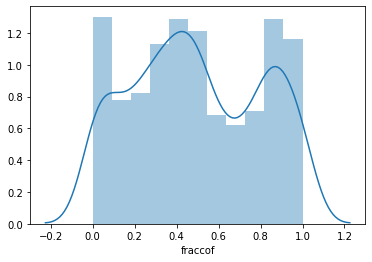

In [15]:
import seaborn as sns
import matplotlib as plt

sns.distplot(coffeesumm['fraccof'])

In [16]:
coffeesumm.to_csv('./ProcessedData/freqcoffeeterms_reviews.csv',index=False)